# Insurance Claims- Fraud Detection

In [1]:
# Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
in_proj = pd.read_csv("Automobile_insurance_fraud.csv")

In [4]:
in_proj

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
in_proj.shape

(1000, 40)

Total number of Rows = 1000 and Columns = 40

In [7]:
in_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

From the above case, we can see _c39 has all the null values and hence we can remove it

In [8]:
in_proj = in_proj.iloc[:,:-1]

In [9]:
in_proj.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [10]:
for i in in_proj.columns:
    if in_proj[i].dtype == 'object':
        print(in_proj[i].value_counts())

28-04-1992    3
01-01-2006    3
05-08-1992    3
22-08-1991    2
14-04-1992    2
             ..
30-09-1993    1
16-03-2014    1
19-10-1990    1
05-07-2001    1
20-10-1993    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [11]:
in_proj.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

From the above case, it is clear that there are no null values present in the given dataset

In [12]:
in_proj.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Visualization ---

# Countplot ---

In [13]:
in_proj.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

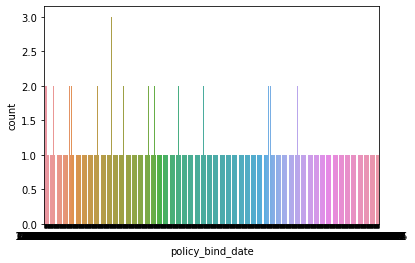

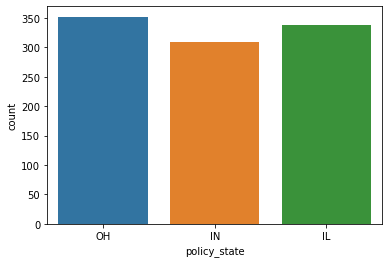

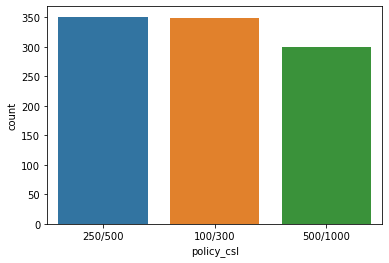

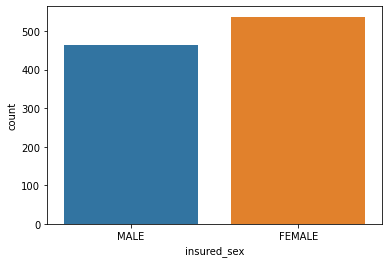

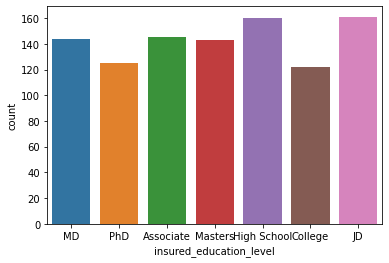

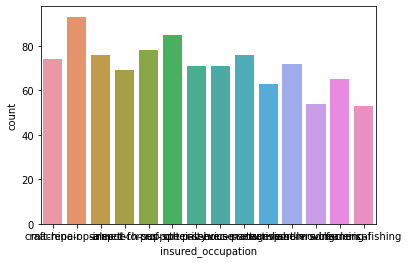

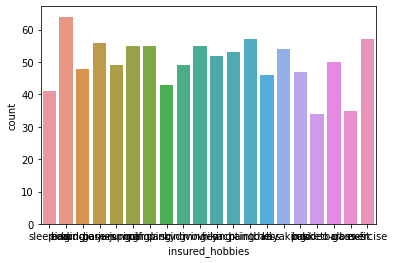

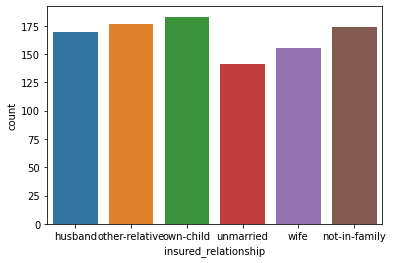

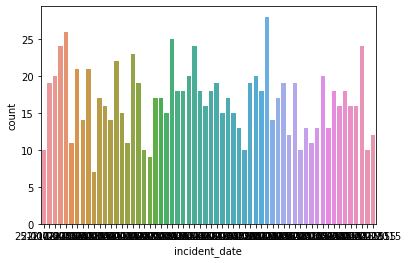

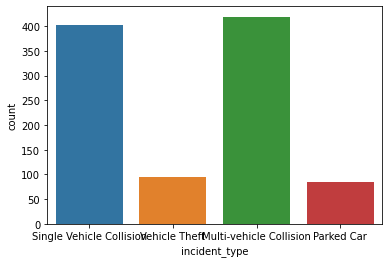

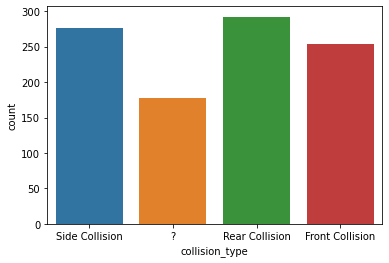

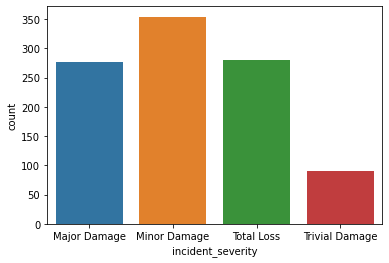

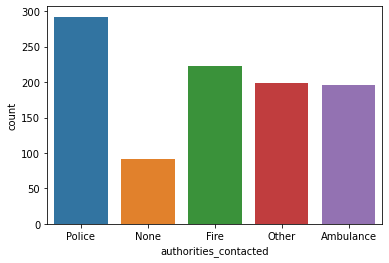

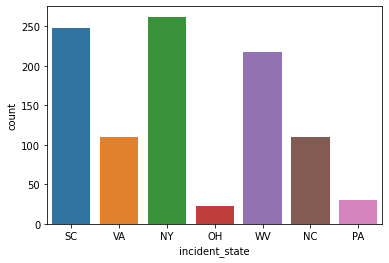

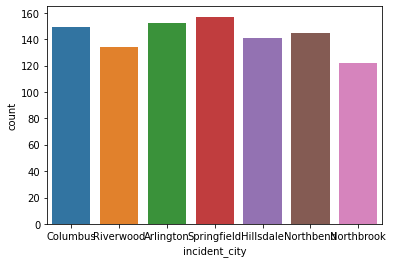

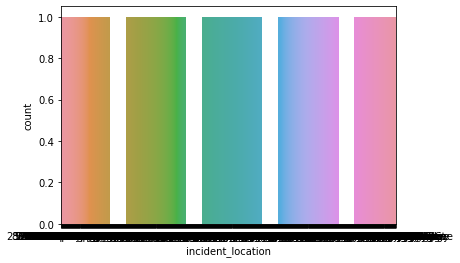

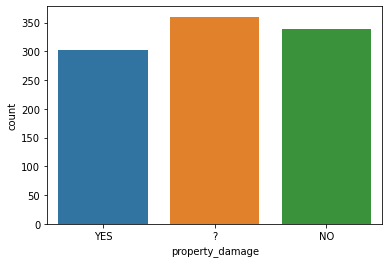

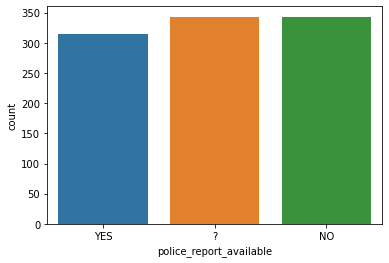

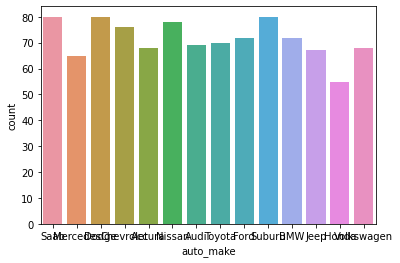

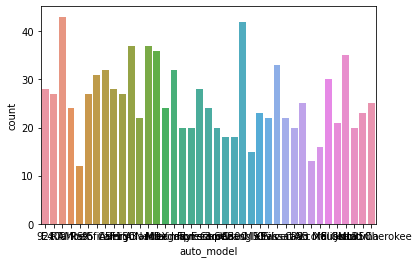

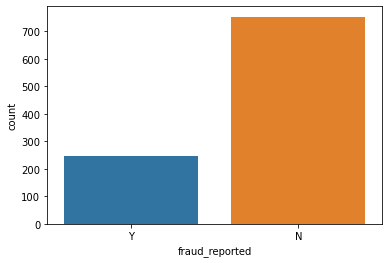

In [14]:
for i in in_proj.columns:
    if in_proj[i].dtype == 'object':
        sns.countplot(in_proj[i])
        plt.show()

In [15]:
in_proj.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


From the above case, the data is highly spread as standard deviation for most of the columns are quite high

In [16]:
# Seperating both the Catagorical Data Columns and Continuous Data Column

In [17]:
cat_cols=[]
con_cols=[]

for i in in_proj.columns:
    if in_proj[i].dtype == 'object':
        cat_cols.append(i)
    else:
        con_cols.append(i)
        
print('Catagorical Data Columns =',cat_cols)

Catagorical Data Columns = ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [18]:
print('Continuous Data Columns =',con_cols)

Continuous Data Columns = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


# EDA

# Normal Distribution Curve ---

In [19]:
in_proj.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [20]:
con_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

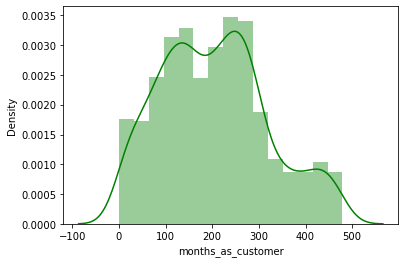

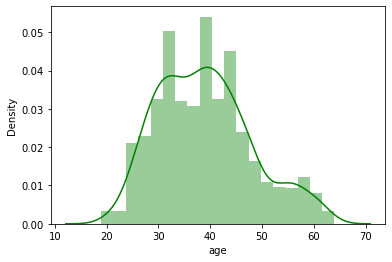

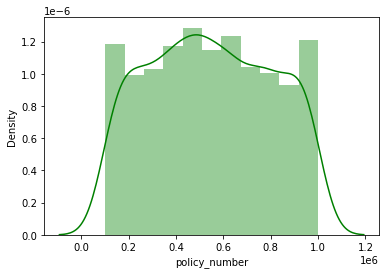

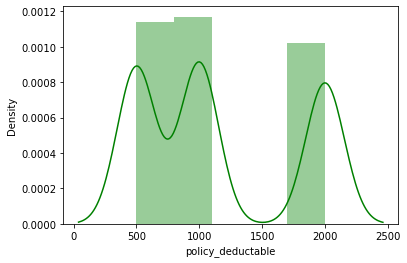

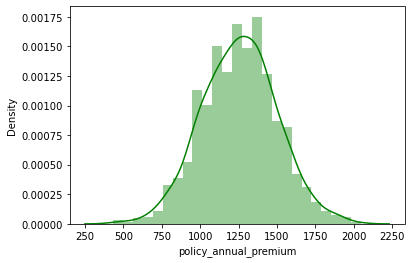

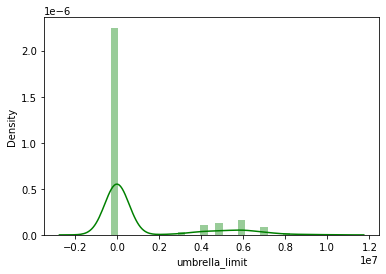

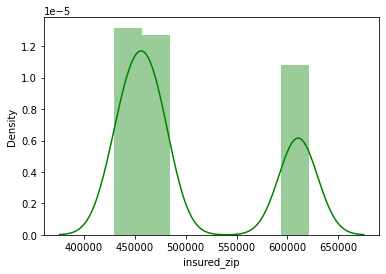

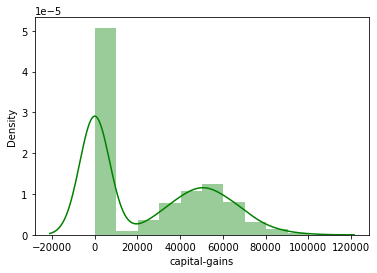

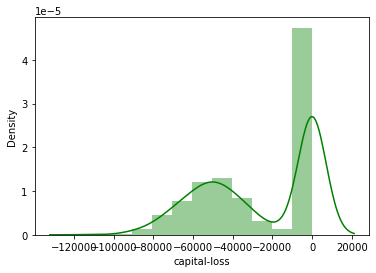

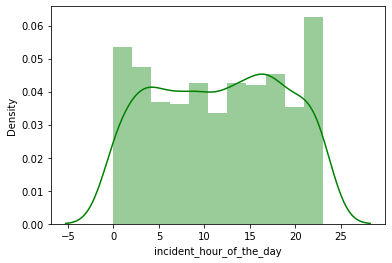

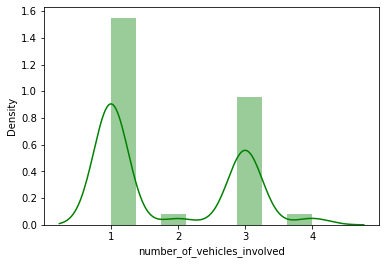

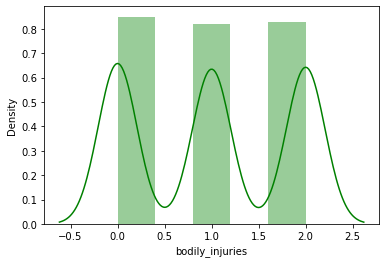

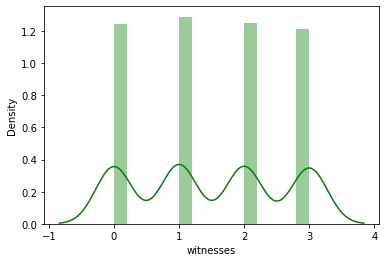

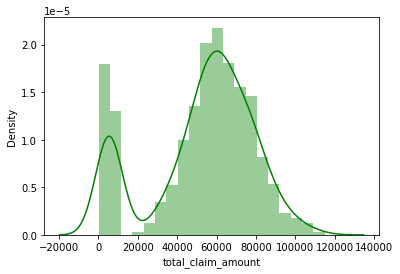

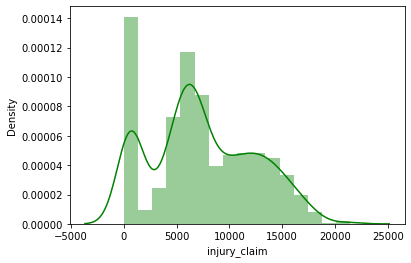

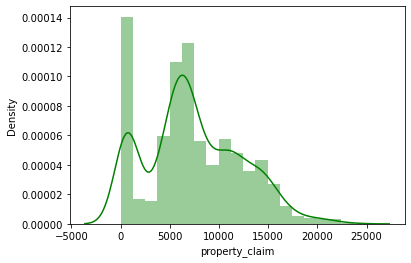

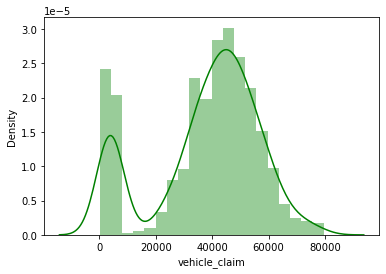

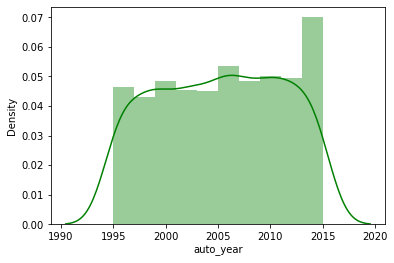

In [21]:
for i in con_cols:
    sns.distplot(in_proj[i], color='green')
    plt.show()

From the above case, the data is not normally distributed

# Checking Outliers ---

In [22]:
con_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

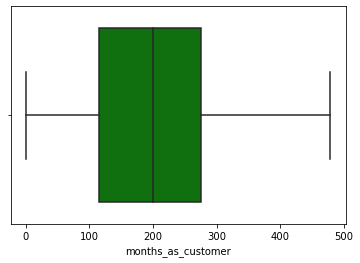

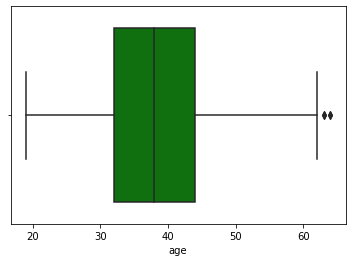

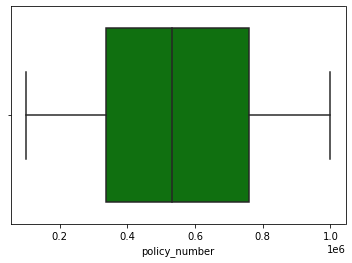

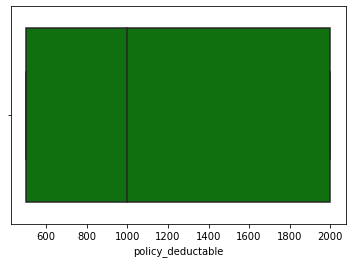

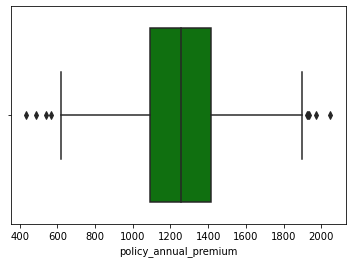

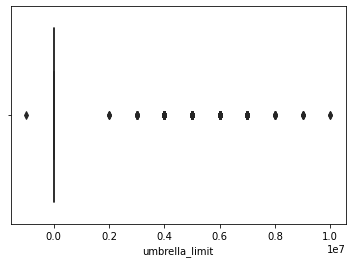

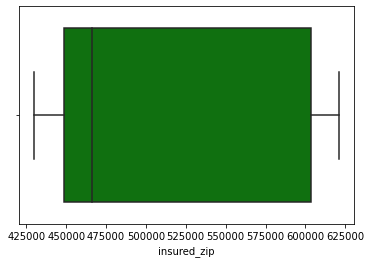

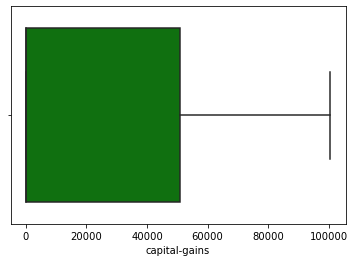

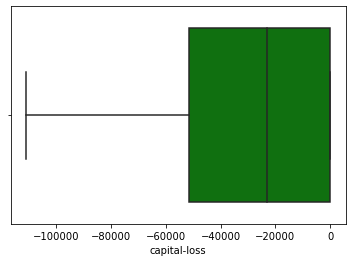

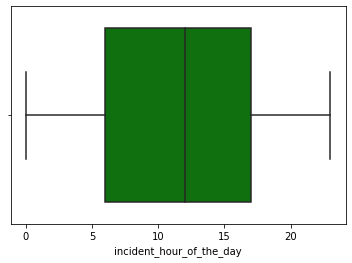

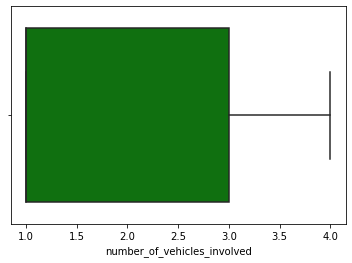

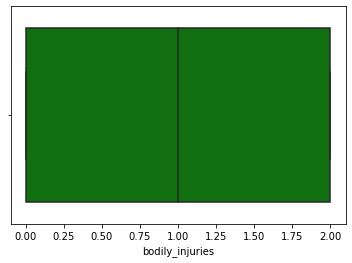

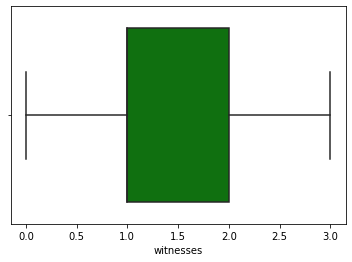

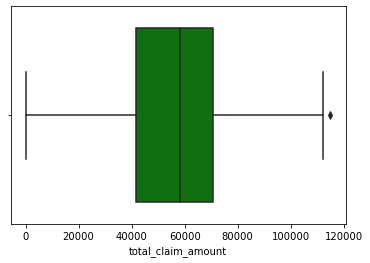

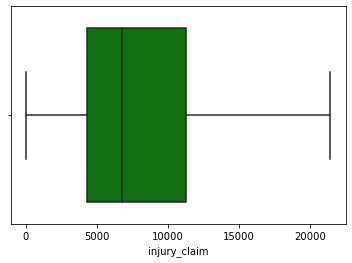

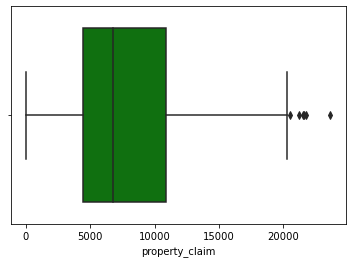

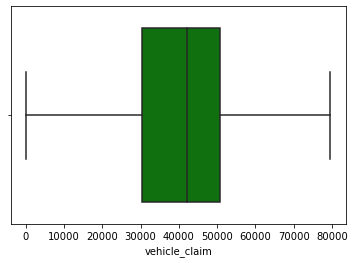

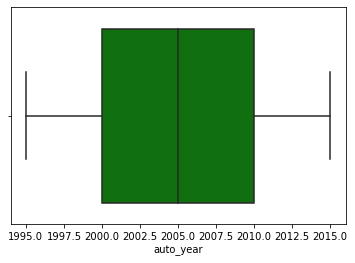

In [23]:
for i in con_cols:
    sns.boxplot(in_proj[i], color='green')
    plt.show()

From the above case, there are few outliers present in the given dataset

In [24]:
in_proj.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

# Correlation ---

In [26]:
in_proj.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


Correlation using Heatmap ---

<AxesSubplot:>

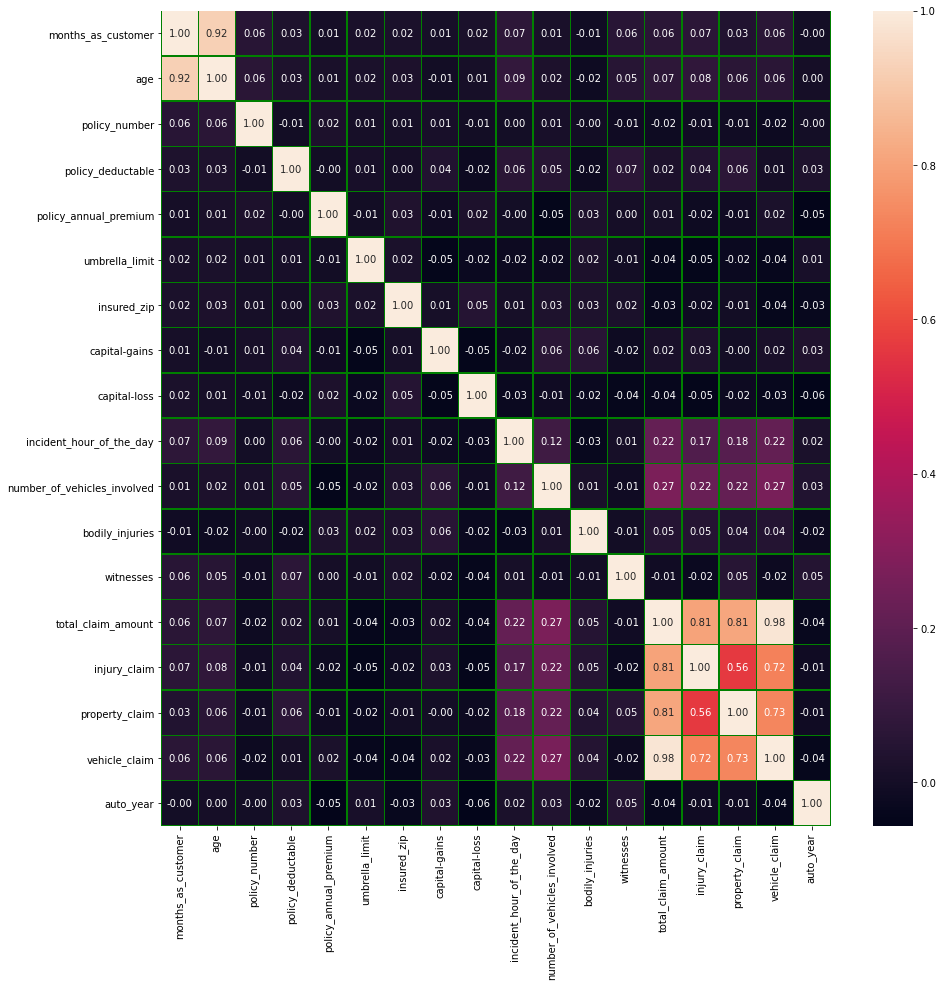

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(in_proj.corr(), annot=True, linewidth=0.5, linecolor='green', fmt='.2f')

In [29]:
# Removing all the given columns that are highly correlated

In [30]:
in_proj.drop(['policy_bind_date','policy_number','insured_hobbies','incident_location'], axis=1, inplace=True)

In [31]:
in_proj

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [32]:
from statistics import mode

for i in ['police_report_available','incident_type','property_damage']:
    print(in_proj[i].value_counts())

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
?      360
NO     338
YES    302
Name: property_damage, dtype: int64


In [33]:
in_proj['police_report_available'] = in_proj['police_report_available'].replace('?','NO')

In [34]:
in_proj['collision_type'].value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [35]:
in_proj['collision_type'] = in_proj['collision_type'].replace('?','Rear Collision')

In [36]:
in_proj['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [37]:
in_proj['property_damage'] = in_proj['property_damage'].replace('?','NO')

In [38]:
in_proj

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [39]:
cat_cols=[]

for i in in_proj:
    if in_proj[i].dtype == 'object':
        cat_cols.append(i)

In [40]:
cat_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [41]:
# Removing the incident date

In [42]:
cat_cols.remove('incident_date')

In [44]:
in_proj.drop(['incident_date'], axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_cols:
    in_proj[i] = le.fit_transform(in_proj[i])

# Checking Multicolinearity ---

In [46]:
x = in_proj.iloc[:,:-1]
y = in_proj.iloc[:,-1]

In [47]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as viff

def calc_vif(x1):
    vif = pd.DataFrame()
    vif["Variables"] = x1.columns
    vif['VIF Factor'] = [viff(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [48]:
calc_vif(x)

,Variables,VIF Factor
0,months_as_customer,28.256463
1,age,131.260457
2,policy_state,2.566212
3,policy_csl,2.456756
4,policy_deductable,4.610399
5,policy_annual_premium,28.417473
6,umbrella_limit,1.267429
7,insured_zip,51.124438
8,insured_sex,1.908250
9,insured_education_level,3.439427


Removing the age and auto_year because they both are very co-linear

In [49]:
in_proj.drop(['auto_year','age'], axis=1, inplace=True)

In [50]:
calc_vif(in_proj.iloc[:,:-1])

,Variables,VIF Factor
0,months_as_customer,4.256663
1,policy_state,2.537487
2,policy_csl,2.444952
3,policy_deductable,4.517749
4,policy_annual_premium,24.742506
5,umbrella_limit,1.266385
6,insured_zip,35.619932
7,insured_sex,1.899612
8,insured_education_level,3.407427
9,insured_occupation,3.700441


In [51]:
from scipy.stats import zscore

z = np.abs(zscore(in_proj))

In [52]:
for i in [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8]:
    
    IP1 = in_proj.copy()
    IP_new = in_proj[(z<i).all(axis=1)]
    loss = ((IP1.shape[0]-IP_new.shape[0])*100)/IP1.shape[0]
    print ("At i",i," LOSS % is",loss)

At i 3  LOSS % is 2.0
At i 3.2  LOSS % is 1.0
At i 3.4  LOSS % is 0.7
At i 3.6  LOSS % is 0.2
At i 3.8  LOSS % is 0.2
At i 4.0  LOSS % is 0.0
At i 4.2  LOSS % is 0.0
At i 4.4  LOSS % is 0.0
At i 4.6  LOSS % is 0.0
At i 4.8  LOSS % is 0.0


In [53]:
in_proj = in_proj[(z<3).all(axis=1)]

In [54]:
x = in_proj.iloc[:,:-1]
y = in_proj.iloc[:,-1]

In [55]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [56]:
x.shape

(1480, 31)

Total number of Rows = 1480 and Columns = 31

In [57]:
y.shape

(1480,)

Total number of Rows = 1480

In [58]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
for i in in_proj.columns:
    if np.abs(in_proj[i].skew())>0.5:
        in_proj[i] = pt.fit_transform(in_proj[i].values.reshape(-1,1))
    elif np.abs(in_proj[i].skew())<-0.5:
        in_proj[i] = pt.fit_transform(in_proj[i].values.reshape(-1,1))

In [59]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = mms.fit_transform(x)

# Logistic Regression ---

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lg = LogisticRegression()
x_train = x
y_train = y
x_test = x
y_test = y
acc = 0
r_state = 0
for i in (0,1000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(tr_x,tr_y)
    pred=lg.predict(t_x)
    if accuracy_score(t_y,pred)>acc:
        acc = accuracy_score(t_y,pred)
        x_train = tr_x
        x_test = t_x
        y_train = tr_y
        y_test = t_y
        r_state = i
print("At Random State",r_state,"Accuracy Score is Maximum i.e.,",acc)

At Random State 0 Accuracy Score is Maximum i.e., 0.8412162162162162


In [61]:
def fun(f):
    f.fit(x_train,y_train)
    pred = f.predict(x_test)
    print("Accuracy Score",accuracy_score(y_test,pred))
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))
    print("Classification Report\n",classification_report(y_test,pred))

In [62]:
fun(lg)

Accuracy Score 0.8412162162162162
Confusion Matrix
 [[115  25]
 [ 22 134]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       140
           1       0.84      0.86      0.85       156

    accuracy                           0.84       296
   macro avg       0.84      0.84      0.84       296
weighted avg       0.84      0.84      0.84       296



In [66]:
cvs(lg)

Cross Val Score [0.78378378 0.79054054 0.7972973  0.79391892 0.80405405]
0.7939189189189189


In [67]:
Acc = [84.12]
CVS = [79.39]
Model = ['Logistic Regression']

# Cross Validation Score ---

In [63]:
from sklearn.model_selection import cross_val_score,KFold

def cvs(m):
    cv1 = KFold(n_splits=5,shuffle=True)
    score = cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross Val Score",score)
    print(score.mean())

In [64]:
from sklearn.model_selection import GridSearchCV

def hypertuning(params,model):
    gd = GridSearchCV(model,params,cv=5,scoring='accuracy')
    gd.fit(x,y)
    print(gd.best_params_)

In [68]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnb = GaussianNB()

In [69]:
from sklearn.svm import SVC

params_svc = {
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}


In [70]:
svc = SVC(degree=3,gamma='scale',kernel='poly',shrinking=True)

In [71]:
fun(svc)

Accuracy Score 0.8209459459459459
Confusion Matrix
 [[109  31]
 [ 22 134]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       140
           1       0.81      0.86      0.83       156

    accuracy                           0.82       296
   macro avg       0.82      0.82      0.82       296
weighted avg       0.82      0.82      0.82       296



In [72]:
cvs(svc)

Cross Val Score [0.78040541 0.83108108 0.85135135 0.80743243 0.83445946]
0.8209459459459459


In [73]:
Acc.append(82.09)
CVS.append(82.09)
Model.append('SVC')

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
params_dtc = {'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[10,20,30],'min_samples_split':[20,30,40]}
hypertuning(params_dtc,dtc)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 40, 'splitter': 'random'}


In [75]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=40,splitter='random')

In [76]:
fun(dtc)

Accuracy Score 0.8040540540540541
Confusion Matrix
 [[111  29]
 [ 29 127]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       140
           1       0.81      0.81      0.81       156

    accuracy                           0.80       296
   macro avg       0.80      0.80      0.80       296
weighted avg       0.80      0.80      0.80       296



In [77]:
cvs(dtc)

Cross Val Score [0.75675676 0.77364865 0.80743243 0.77027027 0.79054054]
0.7797297297297296


In [78]:
Acc.append(80.40)
CVS.append(77.97)
Model.append('Decision Tree Classifier')

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
params_knc = {'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knc,knc)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [80]:
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,weights='distance')

In [81]:
fun(knc)

Accuracy Score 0.7567567567567568
Confusion Matrix
 [[ 78  62]
 [ 10 146]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.56      0.68       140
           1       0.70      0.94      0.80       156

    accuracy                           0.76       296
   macro avg       0.79      0.75      0.74       296
weighted avg       0.79      0.76      0.75       296



In [82]:
cvs(knc)

Cross Val Score [0.71959459 0.73310811 0.77702703 0.76013514 0.7027027 ]
0.7385135135135135


In [83]:
Acc.append(75.67)
CVS.append(73.85)
Model.append('K Neighbors Classifier')

# Classifiers ---

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params_rf = {'n_estimators':[100,200,150,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[10,20,30],
           'min_samples_split':[20,30,40]}
hypertuning(params_rf,rf)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 150}


In [85]:
rf = RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=20,n_estimators=200)

In [86]:
fun(rf)

Accuracy Score 0.8783783783783784
Confusion Matrix
 [[123  17]
 [ 19 137]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       140
           1       0.89      0.88      0.88       156

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296



In [87]:
cvs(rf)

Cross Val Score [0.86486486 0.8277027  0.84797297 0.85472973 0.83445946]
0.845945945945946


In [88]:
Acc.append(87.83)
CVS.append(84.59)
Model.append('Random Forest Classifier')

In [89]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
params_etc = {'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[10,20,30],
            'min_samples_split':[20,30,40]}
hypertuning(params_etc,etc)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 40, 'splitter': 'best'}


In [90]:
etc = ExtraTreeClassifier(criterion='entropy',max_depth=20,min_samples_split=20,splitter='best')

In [91]:
fun(etc)

Accuracy Score 0.831081081081081
Confusion Matrix
 [[116  24]
 [ 26 130]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       140
           1       0.84      0.83      0.84       156

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296



In [92]:
cvs(etc)

Cross Val Score [0.73648649 0.71621622 0.7027027  0.73986486 0.75337838]
0.7297297297297297


In [93]:
Acc.append(83.10)
CVS.append(72.97)
Model.append('Extra Tree Classifier')

In [94]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
params_ada = {'n_estimators':[100,200,150,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150, 'random_state': 43}


In [95]:
ada = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.9,n_estimators=100,random_state=43)

In [96]:
fun(ada)

Accuracy Score 0.8648648648648649
Confusion Matrix
 [[122  18]
 [ 22 134]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       140
           1       0.88      0.86      0.87       156

    accuracy                           0.86       296
   macro avg       0.86      0.87      0.86       296
weighted avg       0.87      0.86      0.86       296



In [97]:
cvs(ada)

Cross Val Score [0.85810811 0.83445946 0.83108108 0.83108108 0.82094595]
0.835135135135135


In [98]:
Acc.append(86.48)
CVS.append(83.51)
Model.append('AdaBoost Classifier')

In [99]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [100]:
fun(xgb)

[00:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 0.8885135135135135
Confusion Matrix
 [[121  19]
 [ 14 142]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       140
           1       0.88      0.91      0.90       156

    accuracy                           0.89       296
   macro avg       0.89      0.89      0.89       296
weighted avg       0.89      0.89      0.89       296



In [101]:
cvs(xgb)

[00:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [102]:
Acc.append(88.85)
CVS.append(86.41)
Model.append('XGB Claasifier')

In [114]:
output = pd.DataFrame()
output['Models'] = Model
output['CVS'] = CVS
output['Accuracy'] = Acc
diff = []

for i in range(0,len(Acc)):
    diff.append(Acc[i]-CVS[i])
    
output['diff'] = diff
output.index+=1

In [115]:
output

,Models,CVS,Accuracy,diff
1,Logistic Regression,79.39,84.12,4.73
2,SVC,82.09,82.09,0.00
3,Decision Tree Classifier,77.97,80.40,2.43
4,K Neighbors Classifier,73.85,75.67,1.82
5,Random Forest Classifier,84.59,87.83,3.24
6,Extra Tree Classifier,72.97,83.10,10.13
7,AdaBoost Classifier,83.51,86.48,2.97
8,XGB Claasifier,86.41,88.85,2.44


From the above case, XGB Classifier is having best accuracy score with least difference between CVS score

# Model Saving ---

In [105]:
import pickle

filename='Insurance_Project.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [106]:
predict = xgb.predict(x_test)

In [107]:
output_1 = pd.DataFrame()
output_1['Actual'] = y_test
output_1['Predicted'] = predict
output_1

,Actual,Predicted
567,0,0
1041,1,1
649,0,1
666,0,1
568,0,1
...,...,...
762,0,0
1090,1,1
1469,1,1
665,0,0


In [108]:
# Let's save the Dataframe in csv file

In [109]:
output_1.to_csv('Insurance_Fraud_Detection.csv')

# AUC ROC Curve ---

In [110]:
from sklearn.metrics import roc_curve,roc_auc_score

In [111]:
y_pred_prob = xgb.predict_proba(x_test)[:,1]

In [112]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

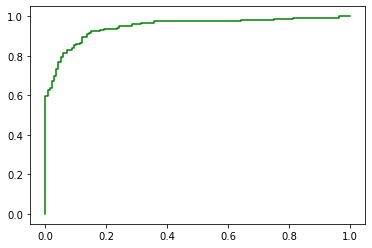

In [113]:
plt.plot(fpr,tpr, color='green')
plt.show()

The Accuracy Score in case of XGB Classifier is the highest i.e. 88.85